In [39]:
import csv
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def load_data(filepath):
    countries = []
    with open(filepath) as f:
        data = csv.DictReader(f)
        for row in data:
            countries.append(row)
    return countries



def calc_features(row):
    return np.array([float(row['Population']),
                     float(row['Net migration']),
                     float(row['GDP ($ per capita)']),
                     float(row['Literacy (%)']),
                     float(row['Phones (per 1000)']),
                     float(row['Infant mortality (per 1000 births)'])])


def hac(features):
    n = len(features)
    linkage_matrix = np.zeros((n - 1, 4))
    
    clusters = [[i] for i in range(n)]
    merged_clusters = set()
    
    for k in range(n - 1):
        min_distance = float('inf')
        merge_i, merge_j = -1, -1
        
        for i in range(len(clusters)):
            if i not in merged_clusters:
                for j in range(i + 1, len(clusters)):
                    if j not in merged_clusters:
                        max_distance = 0.0
                        for p1 in clusters[i]:
                            for p2 in clusters[j]:
                                distance = np.linalg.norm(features[p1] - features[p2])
                                max_distance = max(max_distance, distance)
                        
                        if max_distance < min_distance:
                            min_distance = max_distance
                            merge_i, merge_j = i, j

        new_cluster = clusters[merge_i] + clusters[merge_j]
        merged_clusters.add(merge_i)
        merged_clusters.add(merge_j)
        
        clusters.append(new_cluster)

        linkage_matrix[k, 0] = merge_i
        linkage_matrix[k, 1] = merge_j
        linkage_matrix[k, 2] = min_distance
        linkage_matrix[k, 3] = len(new_cluster)
    
    return linkage_matrix



def fig_hac(Z, names):
    fig = plt.figure(figsize=(10, 6))
    dendrogram(Z,labels=names, leaf_rotation=90)
    plt.tight_layout()
    return fig

def normalize_features(features):
    for f in features:
        favg = np.mean(f)
        fsd = np.std(f)
        norm = [(v - favg)/fsd for v in f]
        return norm

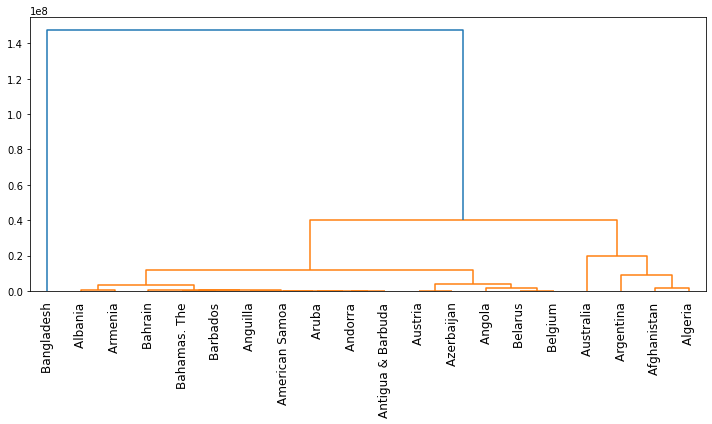

In [41]:
data = load_data("countries.csv")
country_names = [row["Country"] for row in data]
features = [calc_features(row) for row in data]
features_normalized = normalize_features(features)
n = 20
Z_raw = hac(features[:n])
Z_normalized = hac(features_normalized[:n])
fig = fig_hac(Z_raw, country_names[:n])
plt.show()